<a href="https://colab.research.google.com/github/sruby8/uplift.ai/blob/master/Pelvis_Rotation_Angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

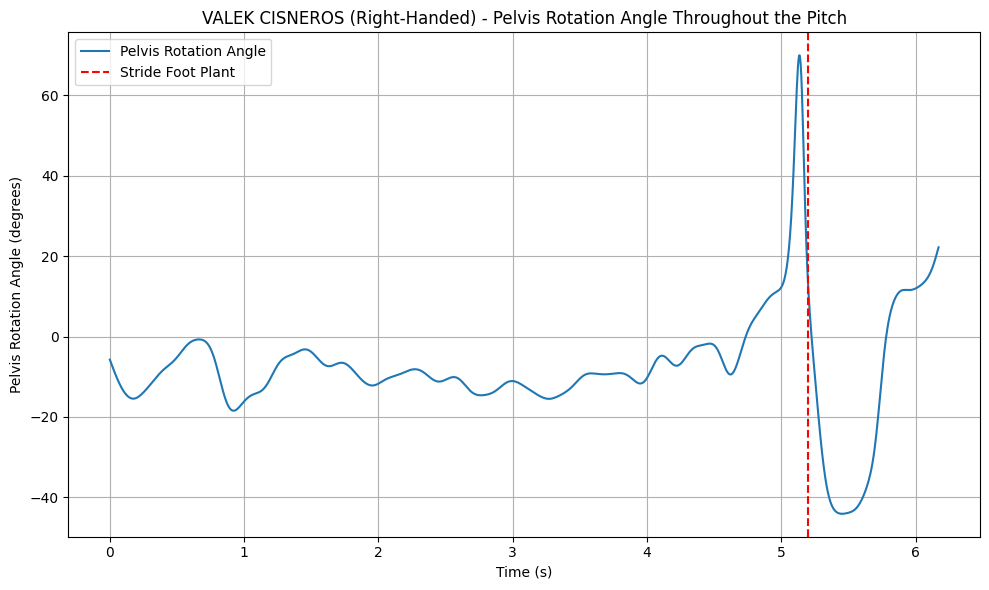

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (update the file path as needed)
df = pd.read_csv('./uplift_data_export_20250321030036.csv')

# Determine handedness. Here, we assume the dataset is for one athlete.
athlete_name = df['athlete_name'].iloc[0].upper()
handedness = df['handedness'].iloc[0].lower()

# Select the appropriate pelvis rotation metric based on handedness
if handedness == 'right':
    pelvis_angle = df['right_hip_internal_rotation_with_respect_to_trunk']
else:
    pelvis_angle = df['left_hip_internal_rotation_with_respect_to_trunk']

# Use fps to create a time vector (assuming each row is a frame)
fps = df['fps'].iloc[0]
time = np.arange(len(df)) / fps

# Identify the first instance where the foot makes contact (foot_contact_frame == 0)
foot_contact_indices = df.index[df['foot_contact_frame'] == 0].tolist()
if foot_contact_indices:
    landing_index = foot_contact_indices[0]
    landing_time = landing_index / fps
else:
    landing_index = None
    landing_time = None

# Plot the pelvis angle over time
plt.figure(figsize=(10, 6))
plt.plot(time, pelvis_angle, label='Pelvis Rotation Angle')
if landing_time is not None:
    plt.axvline(x=landing_time, linestyle='--', color='r', label='Stride Foot Plant')
#    plt.text(landing_time, pelvis_angle.iloc[landing_index], ' Foot Plant',
#    color='r', va='bottom', ha='right')

plt.xlabel('Time (s)')
plt.ylabel('Pelvis Rotation Angle (degrees)')
plt.title(f'{athlete_name} ({handedness.capitalize()}-Handed) - Pelvis Rotation Angle Throughout the Pitch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()